### Import All nececary libraries

In [1]:
import os
import sys
sys.path.append('../scripts')
import EDA as eda
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import sentimentAnalysis as sm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Data

In [2]:
df = eda.LoadData("../data/raw_analyst_ratings.csv")

### Inspecting and pre-processing the data

In [3]:
eda.InspectData(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
eda.GetShape(df)

(1407328, 6)

In [5]:
eda.GetSummary(df)

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [6]:
eda.GetColumns(df)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [7]:
eda.GetColumnNames(df)

['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

In [8]:
eda.GetColumnTypes(df)

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

### Cleaning the data

In [9]:
# Check missing value
eda.CheckMissingValue(df)

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [10]:
# Remove irelevant feature and check it again
eda.RemoveColumn(df)


### Perform descriptive statistics

Calculate the length of headlines to understand the distribution

In [11]:
eda.GetSummary(df)

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [12]:
# Calculate the new's headline lenght
dataFrame = eda.AddHeadlineLength(df)

In [13]:
dataFrame["headline_length"].head()

0    39
1    42
2    29
3    44
4    87
Name: headline_length, dtype: int64

In [14]:
# Let's view the basic statistics of the headline length
eda.GtHeadlineLengthStats(dataFrame)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Examine the publication dates to identify trends over time.

In [15]:
# Check the length of the date strings
dataFrame['date_length'] = dataFrame['date'].apply(len)
print(dataFrame['date_length'].value_counts())

date_length
19    1351341
25      55987
Name: count, dtype: int64


In [16]:
df = eda.ConvertDdate(dataFrame)
df

,headline,url,publisher,date,stock,headline_length,date_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25
...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,19
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,19
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,19
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,19


In [17]:
formattedData = eda.EctractTimeFormat(dataFrame)

In [18]:
formattedData.head()

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25,2020,6,5,10,30
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25,2020,6,3,10,45
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25,2020,5,26,4,30
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25,2020,5,22,12,45
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25,2020,5,22,11,38


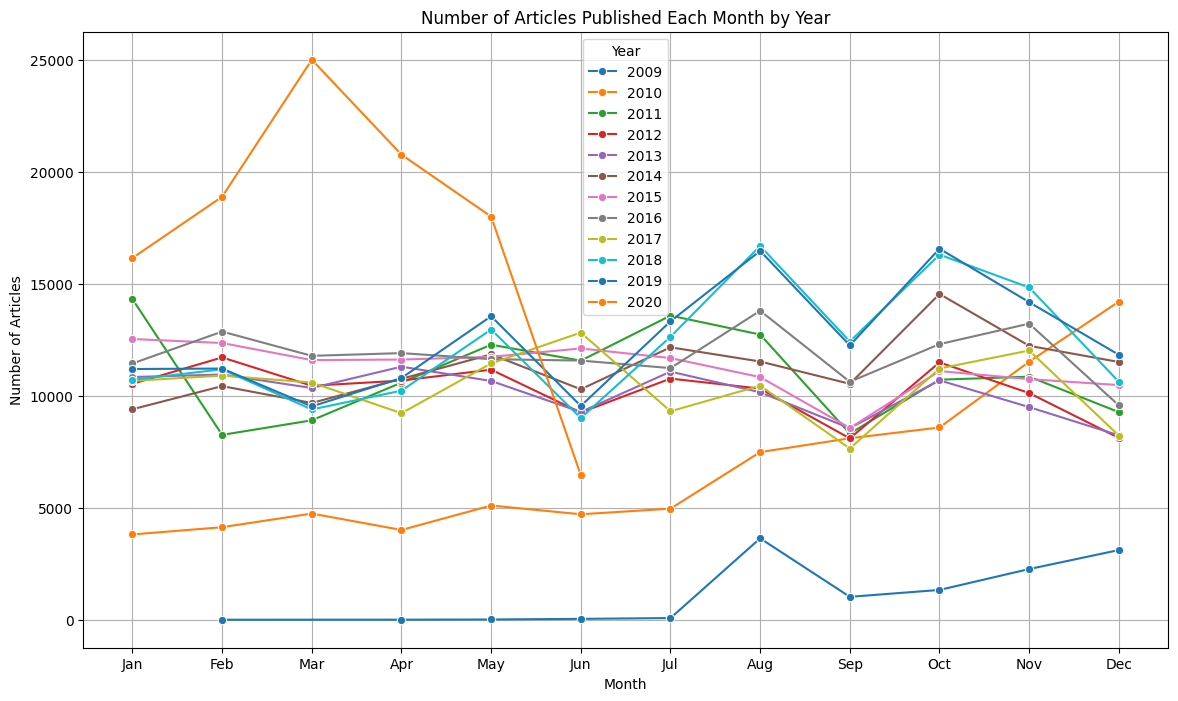

In [19]:
eda.ArticlePublishedYearly(formattedData)

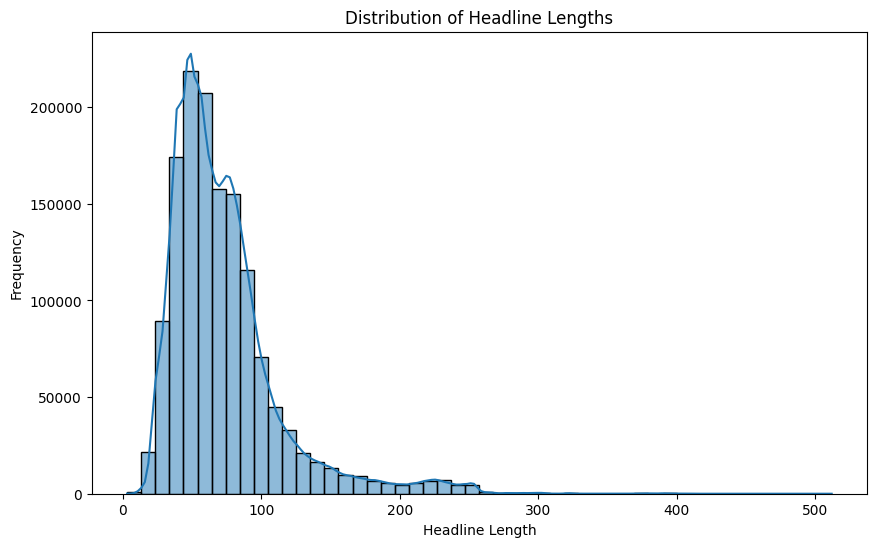

In [20]:
eda.HeadlineLength(formattedData)


e:\Development\10-Accademy-week-1\notebooks\../scripts\EDA.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


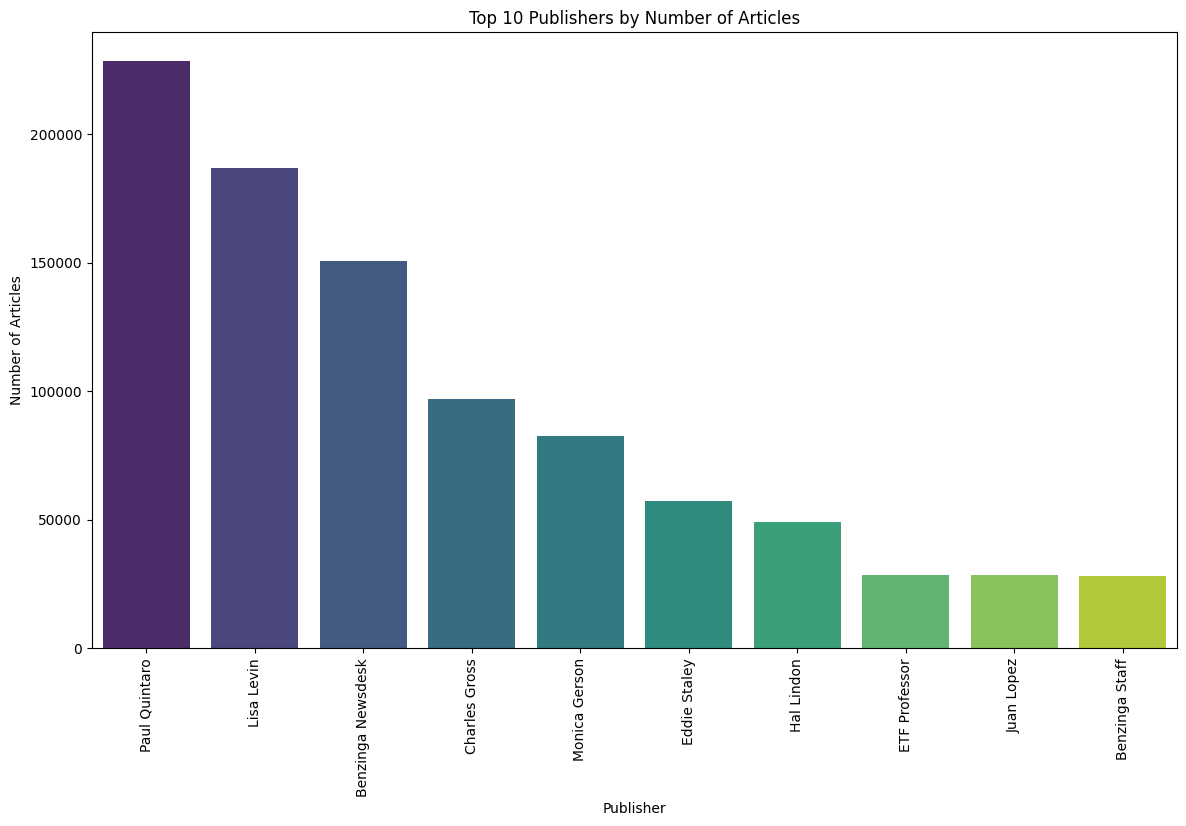

In [21]:
eda.TopPublisher(formattedData)

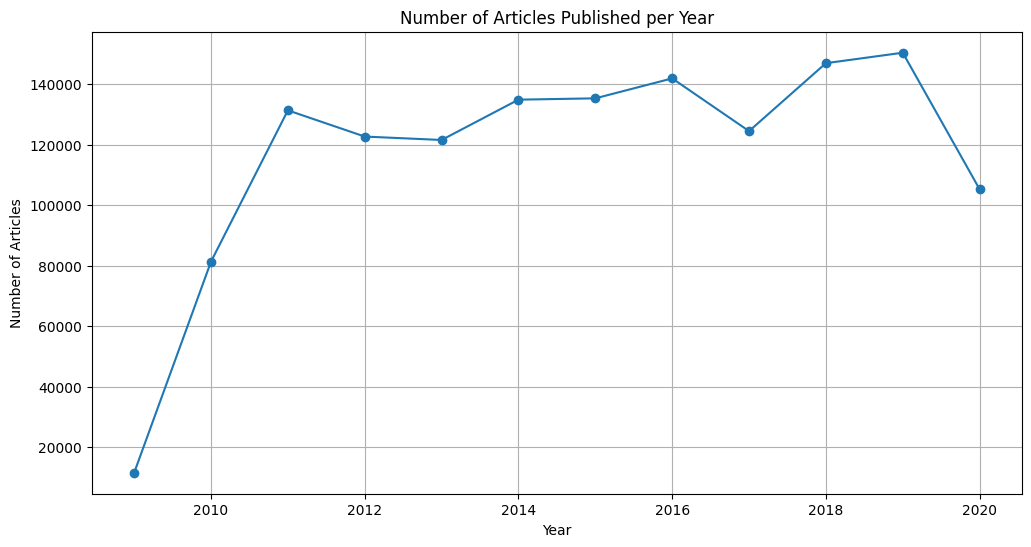

In [22]:
eda.YearlyArticlePublished(formattedData)

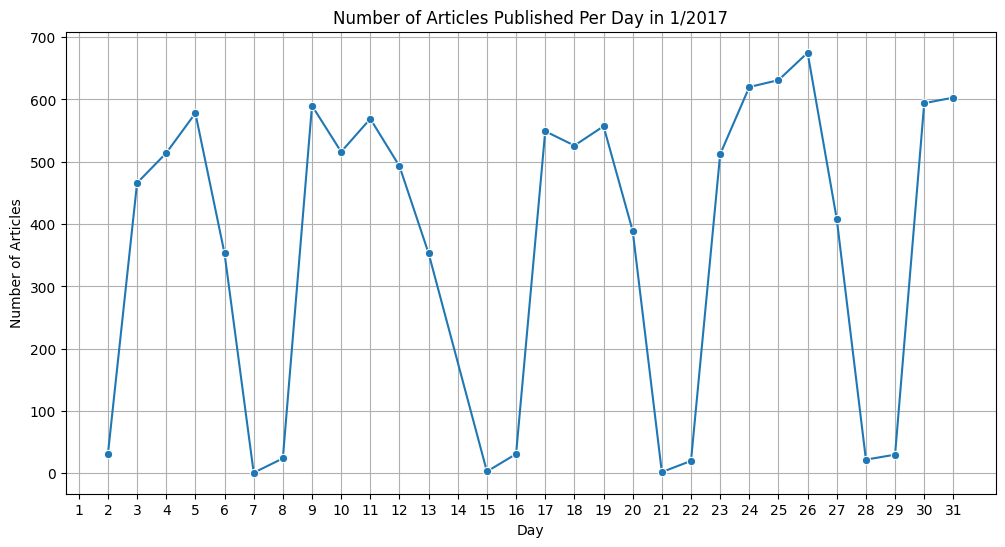

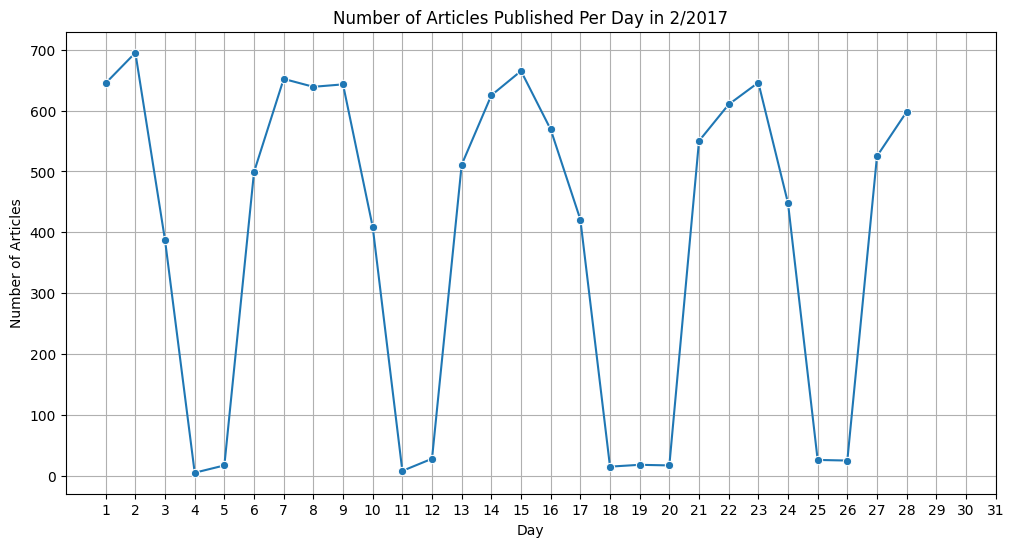

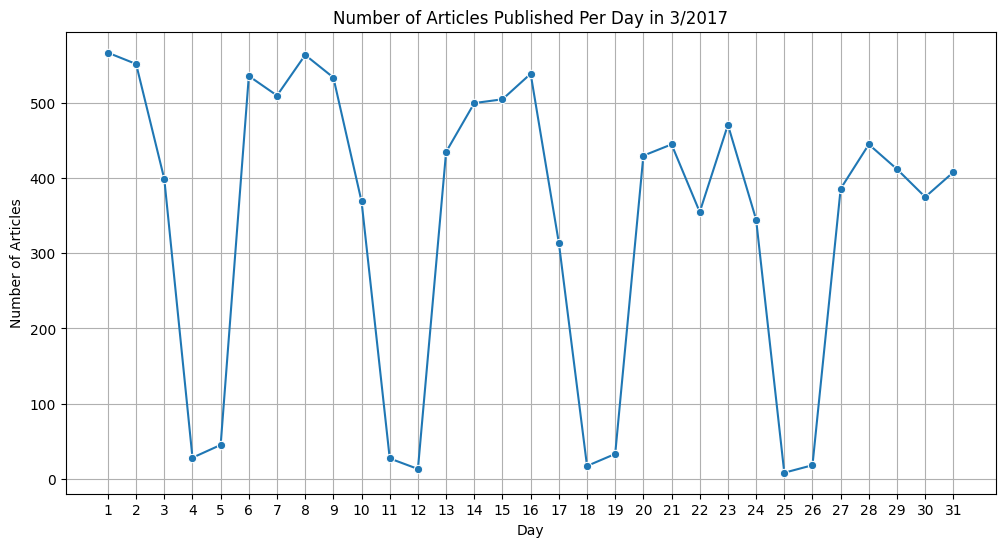

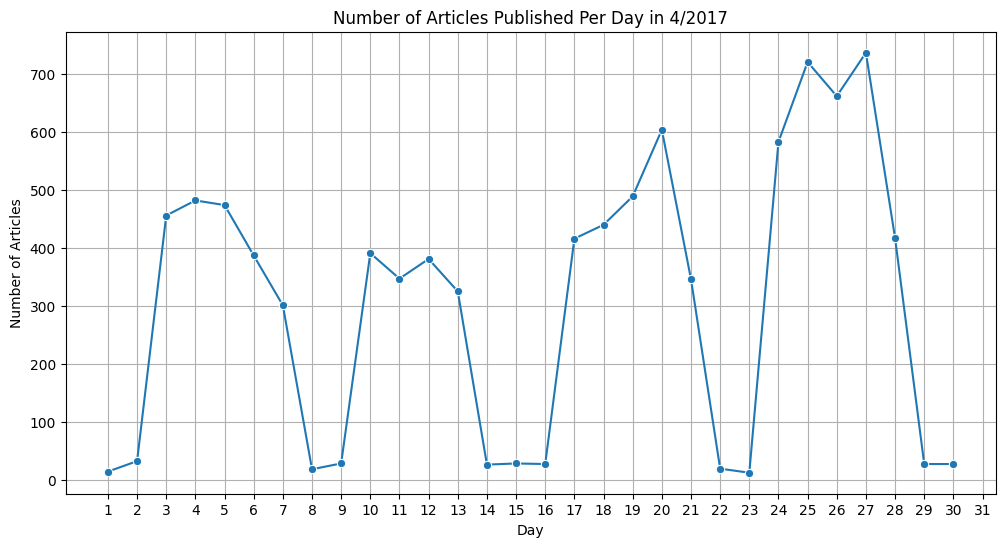

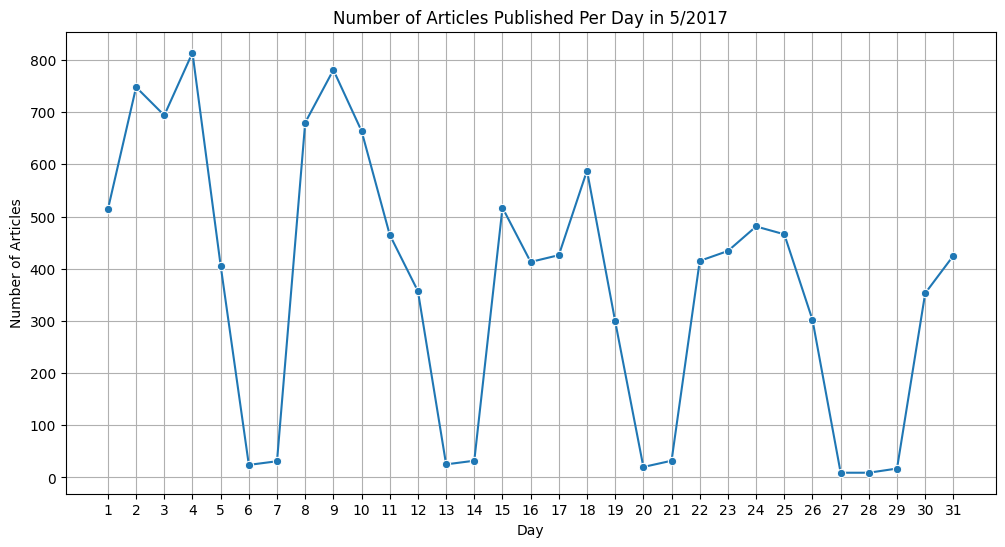

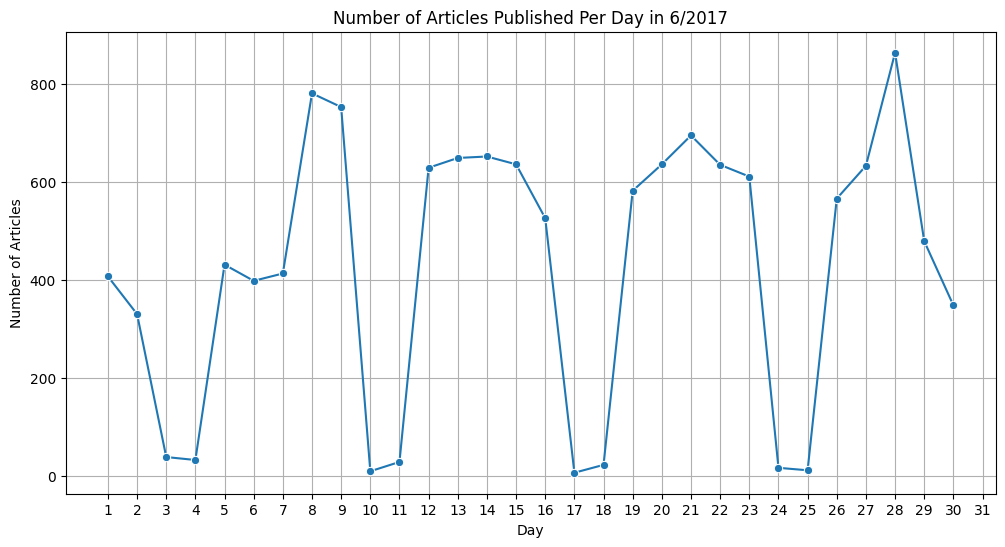

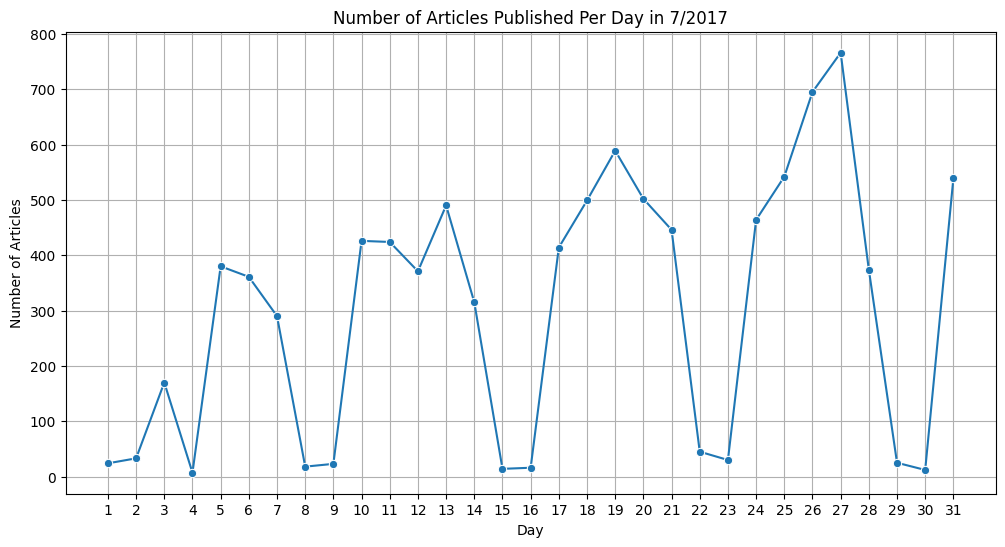

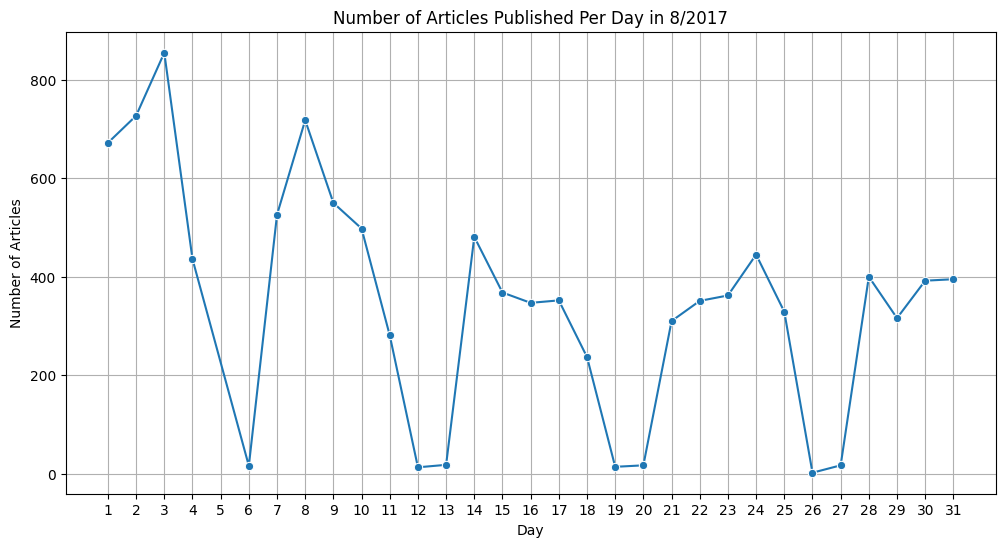

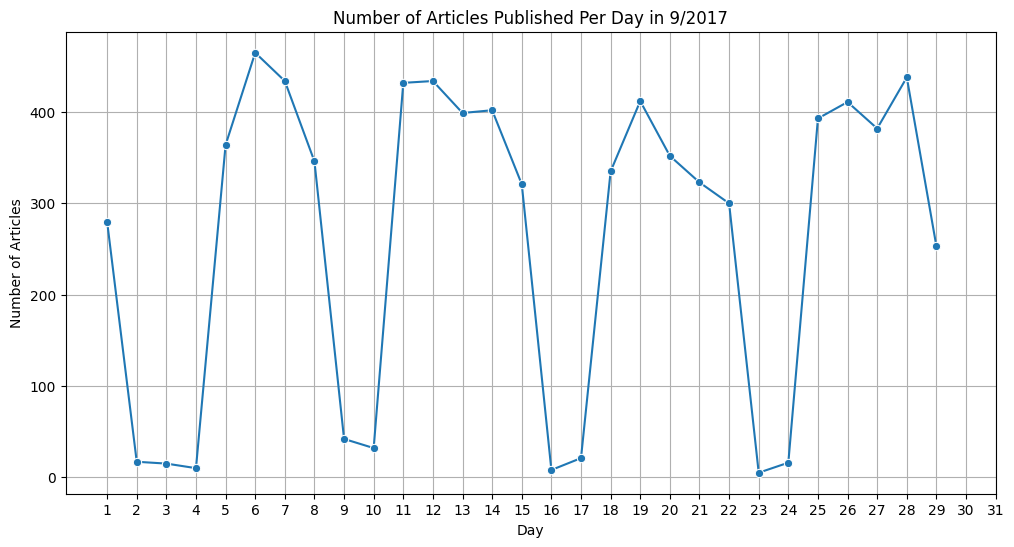

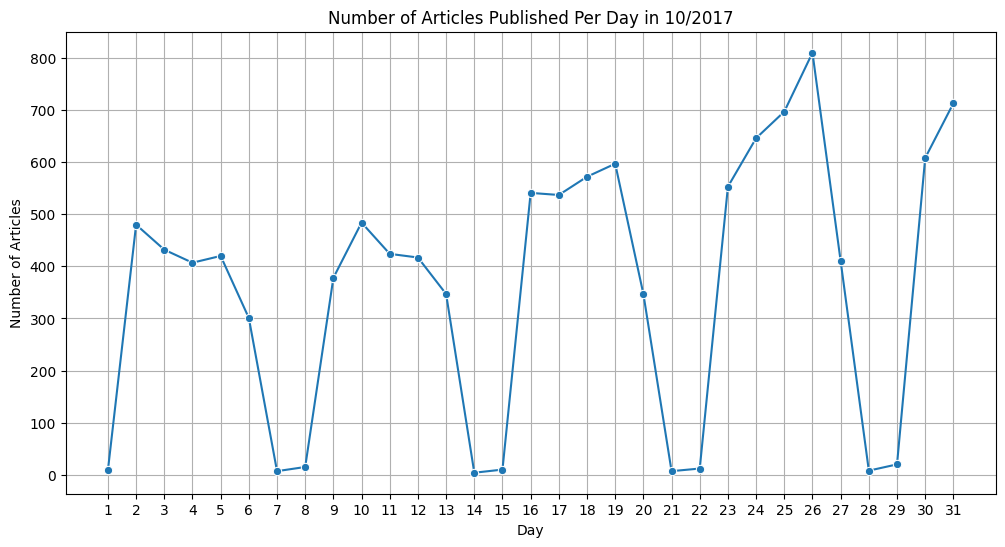

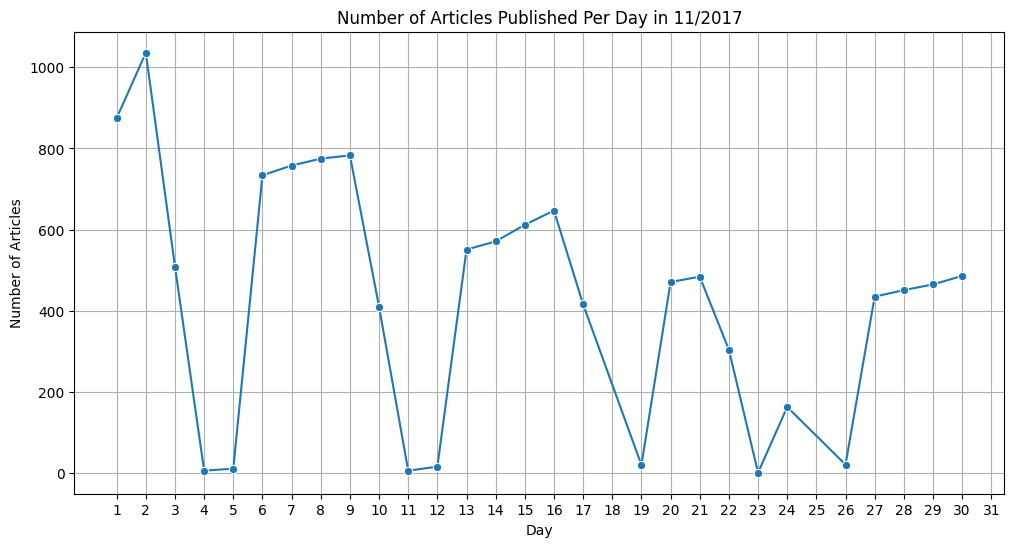

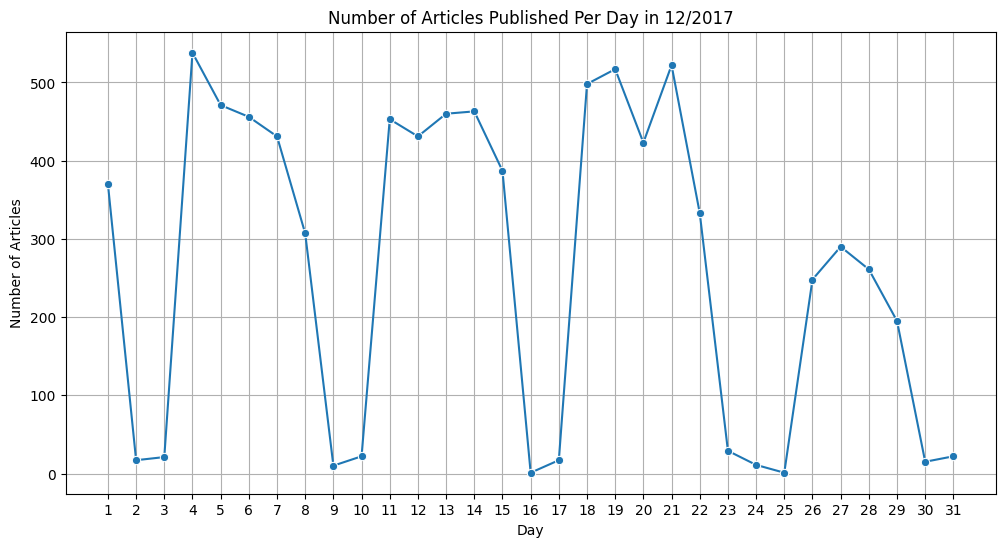

In [23]:
eda.DailyArticlesPublishedEachMonth(formattedData)

Filter data for January of 2018, 2019, and 2020

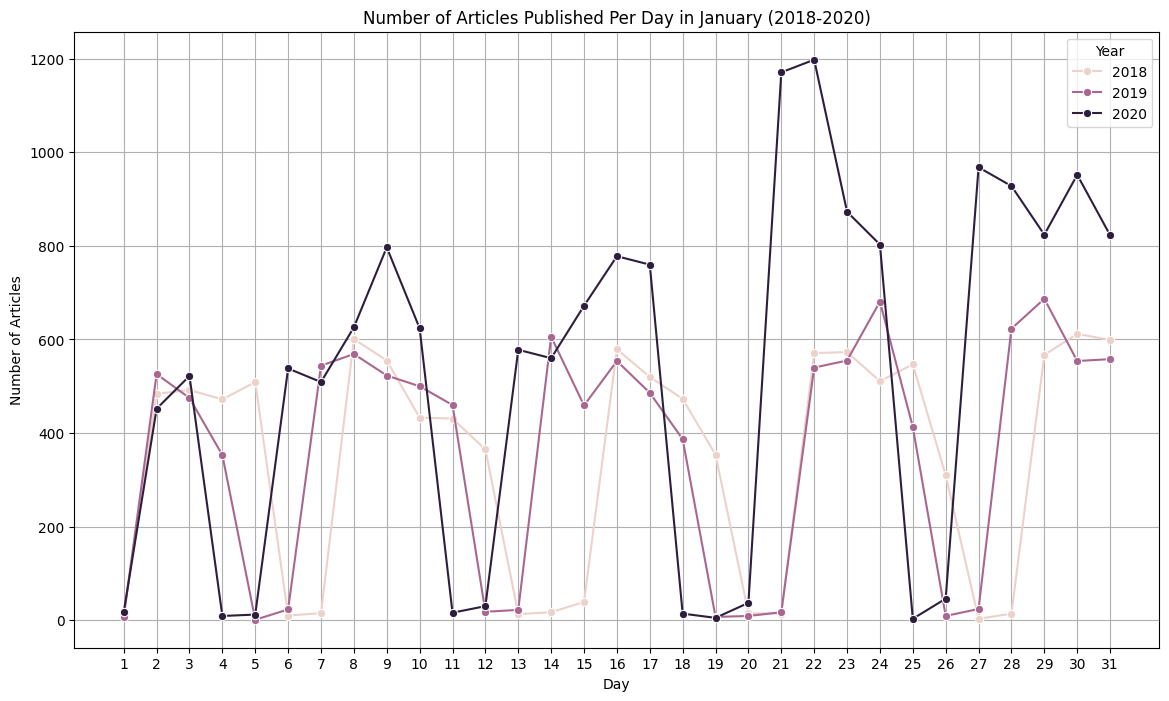

In [24]:
eda.ThreeYearJanu(formattedData)

The number of Article Published Over a time

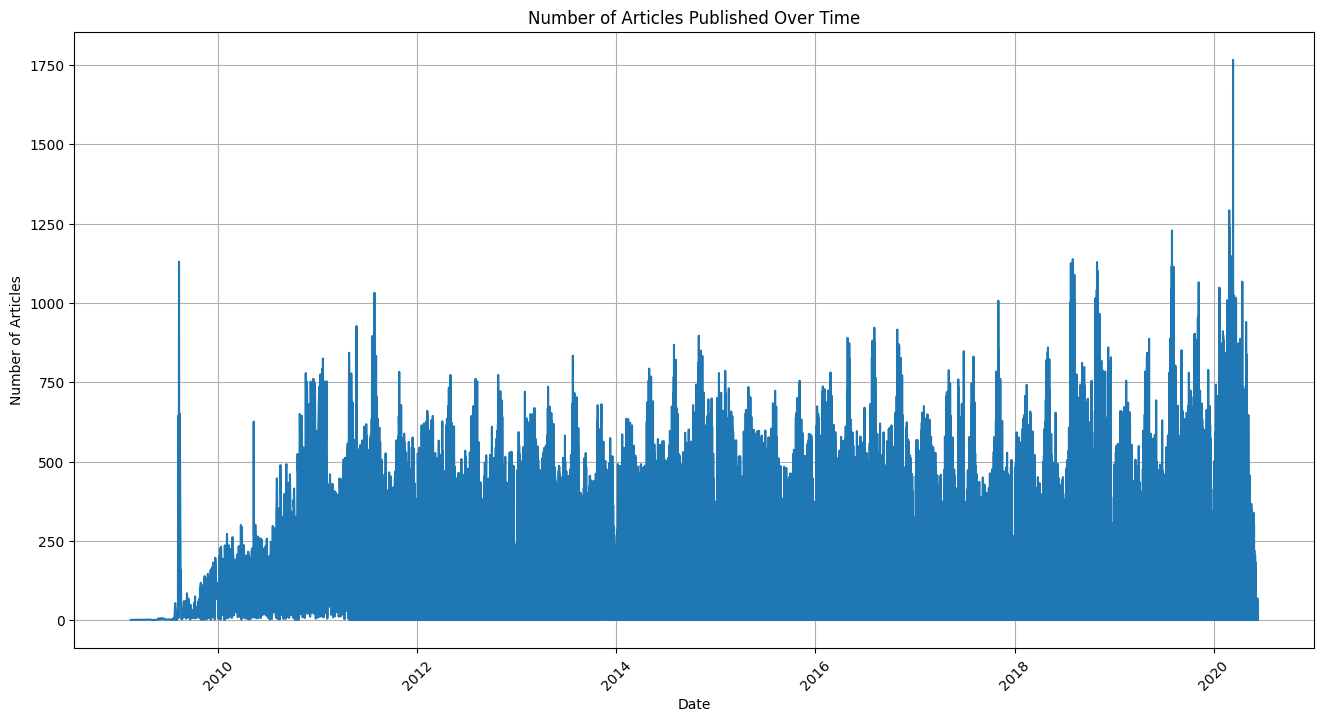

In [25]:
eda.NumArticlePubTime(formattedData)

### Text Analysis

# Sentimenet analysis

Extract headline column for analysis

In [26]:
headlines = sm.ExtractHeadline(formattedData)

#### Pre-process text(stopword elimination, stemming) 

In [27]:
ProcessedHeadline =[sm.PreprocessText(headline) for headline in headlines ]

I use SentimentIntensityAnalyzer from NLTK to determine the sentiment of each headline.

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tsegaye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
SA = SentimentIntensityAnalyzer()
sentiments = [SA.polarity_scores(headline)["compound"] for headline in ProcessedHeadline]

In [30]:
formattedData["sentiment"] = sentiments
formattedData["sentiment_class"] = formattedData["sentiment"].apply(sm.ClassifySentiment)

In [31]:
formattedData.head(10)

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute,sentiment,sentiment_class
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25,2020,6,5,10,30,0.0000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25,2020,6,3,10,45,0.0000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25,2020,5,26,4,30,0.0000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25,2020,5,22,12,45,0.0000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25,2020,5,22,11,38,0.3400,Neutral
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25,A,71,25,2020,5,22,11,23,-0.2960,Negative
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20,A,73,25,2020,5,22,9,36,0.0000,Neutral
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04,A,120,25,2020,5,22,9,7,0.2960,Neutral
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59,A,84,25,2020,5,22,8,37,-0.1027,Negative
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17,A,42,25,2020,5,22,8,6,0.0000,Neutral


#### Let's pring out top 10 headlines for each sentiment class

In [32]:
formattedData[formattedData['sentiment_class'] == 'Positive'].nlargest(10, 'sentiment')

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute,sentiment,sentiment_class
603047,Shares of several home improvement companies a...,https://www.benzinga.com/wiim/20/04/15799084/s...,Benzinga Newsdesk,2020-04-14 00:00:00,HD,254,19,2020,4,14,0,0,0.9744,Positive
759479,Shares of several home improvement companies a...,https://www.benzinga.com/wiim/20/04/15799084/s...,Benzinga Newsdesk,2020-04-14 00:00:00,LL,254,19,2020,4,14,0,0,0.9744,Positive
774253,Shares of several home improvement companies a...,https://www.benzinga.com/wiim/20/04/15799084/s...,Benzinga Newsdesk,2020-04-14 00:00:00,LOW,254,19,2020,4,14,0,0,0.9744,Positive
294336,"Seeing Major Volatility In Low Priced, Low Flo...",https://www.benzinga.com/movers/18/01/10979138...,Paul Quintaro,2018-01-03 00:00:00,CREG,244,19,2018,1,3,0,0,0.9686,Positive
718097,"Seeing Major Volatility In Low Priced, Low Flo...",https://www.benzinga.com/movers/18/01/10979138...,Paul Quintaro,2018-01-03 00:00:00,KBSF,244,19,2018,1,3,0,0,0.9686,Positive
1021482,"Seeing Major Volatility In Low Priced, Low Flo...",https://www.benzinga.com/movers/18/01/10979138...,Paul Quintaro,2018-01-03 00:00:00,POWL,244,19,2018,1,3,0,0,0.9686,Positive
166417,Richard Schottenfeld Decreases Active Barnes A...,https://www.benzinga.com/news/19/06/13916838/r...,Benzinga_Newsdesk,2019-06-13 11:24:00,BKS,206,25,2019,6,13,11,24,0.9666,Positive
944138,Several Low-Float Stocks Seeing Significant Vo...,https://www.benzinga.com/trading-ideas/movers/...,Hal Lindon,2018-03-07 00:00:00,OGEN,254,19,2018,3,7,0,0,0.9633,Positive
1105774,Several Low-Float Stocks Seeing Significant Vo...,https://www.benzinga.com/trading-ideas/movers/...,Hal Lindon,2018-03-07 00:00:00,RXII,254,19,2018,3,7,0,0,0.9633,Positive
1369371,WidePoint Awarded Multi-Year Award to Support ...,https://www.benzinga.com/news/contracts/18/04/...,Eddie Staley,2018-04-04 00:00:00,WYY,195,19,2018,4,4,0,0,0.9633,Positive


In [33]:
formattedData[formattedData['sentiment_class'] == 'Negative'].nlargest(10, 'sentiment')

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute,sentiment,sentiment_class
745340,KongZhong Forms Special Committee Of 2 Indepen...,https://www.benzinga.com/news/15/07/5655990/ko...,Eddie Staley,2015-07-08,KZ,135,19,2015,7,8,0,0,-0.0005,Negative
933287,Cramer's Stop Trading: Surprised That News Cor...,https://www.benzinga.com/media/cnbc/11/06/1213...,Allie Wickman,2011-06-29,NWS,88,19,2011,6,29,0,0,-0.0010,Negative
480076,"U.S. Steel, Freeport-McMoRan Down ~4%; Axiom's...",https://www.benzinga.com/analyst-ratings/analy...,Paul Quintaro,2016-10-13,FCX,185,19,2016,10,13,0,0,-0.0015,Negative
1370484,"U.S. Steel, Freeport-McMoRan Down ~4%; Axiom's...",https://www.benzinga.com/analyst-ratings/analy...,Paul Quintaro,2016-10-13,X,185,19,2016,10,13,0,0,-0.0015,Negative
654970,March 2010 Jobs Data Somewhat Disappointing in...,https://www.benzinga.com/205440/march-2010-job...,tradermark,2010-04-02,III,90,19,2010,4,2,0,0,-0.0018,Negative
509549,Hearing A Brazilian Regulatory Agency Has Agre...,https://www.benzinga.com/news/19/01/12928370/h...,Benzinga Newsdesk,2019-01-03,FOX,104,19,2019,1,3,0,0,-0.0026,Negative
510047,Hearing A Brazilian Regulatory Agency Has Agre...,https://www.benzinga.com/news/19/01/12928370/h...,Benzinga Newsdesk,2019-01-03,FOXA,104,19,2019,1,3,0,0,-0.0026,Negative
577799,Here's Why Goldman Sachs Doesn't Like Garmin A...,https://www.benzinga.com/analyst-ratings/analy...,Jayson Derrick,2015-04-02,GRMN,86,19,2015,4,2,0,0,-0.0026,Negative
538095,Gold’s Double Top in June 2010 Ain’t Working S...,https://www.benzinga.com/etfs/commodity-etfs/1...,Benzinga Staff,2010-07-01,GDX,52,19,2010,7,1,0,0,-0.0036,Negative
962149,Overstock.com Extends Promotion Pricing Books ...,https://www.benzinga.com/news/13/08/3806224/ov...,Paul Quintaro,2013-08-01,OSTK,71,19,2013,8,1,0,0,-0.0046,Negative


In [34]:
formattedData[formattedData['sentiment_class'] == 'Neutral'].nlargest(10, 'sentiment')

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute,sentiment,sentiment_class
1385226,XPO Posts Solid Bottom-Line Numbers In Third Q...,https://www.benzinga.com/news/earnings/19/10/1...,FreightWaves,2019-10-29,XPO,86,19,2019,10,29,0,0,0.4993,Neutral
1275546,"Shares Of Brink`s Home Security Holdings, Inc ...",https://www.benzinga.com/markets/company-news/...,Benzinga Staff 5,2010-01-20,TYC,90,19,2010,1,20,0,0,0.4990,Neutral
488949,This Analyst Is A Little Skeptical Of FireEye'...,https://www.benzinga.com/analyst-ratings/analy...,Jim Swanson,2016-11-04,FEYE,87,19,2016,11,4,0,0,0.4989,Neutral
254049,UPDATE: Piper Jaffray Downgrades Town Sports I...,https://www.benzinga.com/analyst-ratings/analy...,Dwight Einhorn,2014-02-20,CLUB,88,19,2014,2,20,0,0,0.4976,Neutral
358615,US Federal Reserve Unveils Final Rules Easing ...,https://www.benzinga.com/government/19/10/1457...,Benzinga Newsdesk,2019-10-10,DIA,140,19,2019,10,10,0,0,0.4976,Neutral
572358,Little Reason For Optimism In GoPro's Chart,https://www.benzinga.com/news/16/01/6143345/li...,Wayne Duggan,2016-01-14,GPRO,43,19,2016,1,14,0,0,0.4976,Neutral
689637,Zoetis Shares Up 5% After Hours; SunTrust Earl...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-03-18,JAZZ,189,19,2020,3,18,0,0,0.4973,Neutral
1405546,Zoetis Shares Up 5% After Hours; SunTrust Earl...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-03-18,ZTS,189,19,2020,3,18,0,0,0.4973,Neutral
1022808,Dutch Court Rules in Favor of Akzo Nobel Over ...,https://www.benzinga.com/news/17/05/9532514/du...,Charles Gross,2017-05-29,PPG,134,19,2017,5,29,0,0,0.4970,Neutral
303959,Play IPOs Without The Risk,https://www.benzinga.com/general/10/07/369855/...,Aaron Levitt,2010-07-11,CSD,26,19,2010,7,11,0,0,0.4963,Neutral


In [35]:
formattedData[formattedData['sentiment_class'] == 'Very Negative'].nlargest(10, 'sentiment')

,headline,url,publisher,date,stock,headline_length,date_length,year,month,day,hour,minute,sentiment,sentiment_class
410900,Islamic State Claims Responsibility for Palm S...,https://www.benzinga.com/news/17/04/9279759/is...,Charles Gross,2017-04-09 09:25:04,EGPT,113,25,2017,4,9,9,25,-0.5010,Very Negative
1356420,Hearing Reports of at Least 7 Injured and Poss...,https://www.benzinga.com/news/13/06/3673971/he...,Charles Gross,2013-06-13 00:00:00,WMB,104,19,2013,6,13,0,0,-0.5010,Very Negative
130229,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,BABA,254,19,2020,2,5,0,0,-0.5023,Very Negative
157647,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,BIDU,254,19,2020,2,5,0,0,-0.5023,Very Negative
287982,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,CPHI,254,19,2020,2,5,0,0,-0.5023,Very Negative
295864,Shares of several software companies are tradi...,https://www.benzinga.com/wiim/20/02/15259632/s...,Benzinga Newsdesk,2020-02-05 00:00:00,CRM,245,19,2020,2,5,0,0,-0.5023,Very Negative
697988,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,JD,254,19,2020,2,5,0,0,-0.5023,Very Negative
899071,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,NIO,254,19,2020,2,5,0,0,-0.5023,Very Negative
1090909,Shares of several software companies are tradi...,https://www.benzinga.com/wiim/20/02/15259632/s...,Benzinga Newsdesk,2020-02-05 00:00:00,RNG,245,19,2020,2,5,0,0,-0.5023,Very Negative
1204600,Shares of several US-listed Chinese companies ...,https://www.benzinga.com/wiim/20/02/15259371/s...,Benzinga Newsdesk,2020-02-05 00:00:00,TAL,254,19,2020,2,5,0,0,-0.5023,Very Negative


let's see the sentiment score

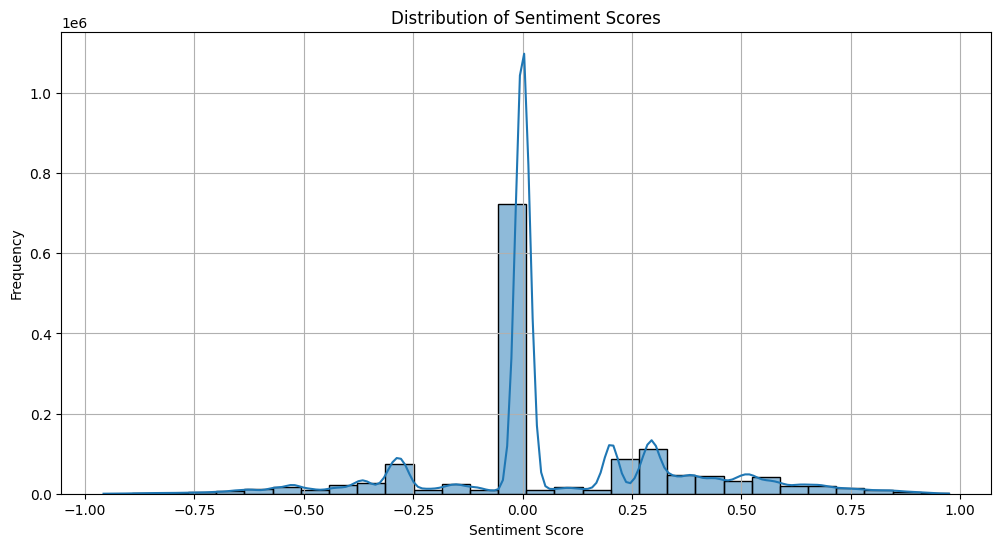

In [36]:
sm.sentimentScore(formattedData)

let's see the sentiment class

e:\Development\10-Accademy-week-1\notebooks\../scripts\sentimentAnalysis.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=df, palette='viridis')


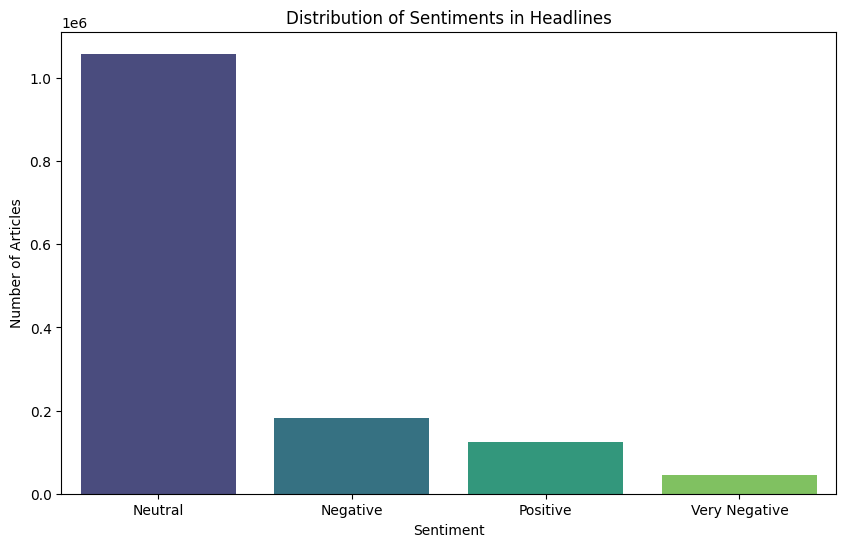

In [37]:
sm.SentimentClass(formattedData)

#### Extract key-word and phrases and displays top-n word TF-IDF metods of vectorization

1. Comput TF-IDF

In [38]:
X, feature_names, vocabulary = sm.ComputeTfidf(ProcessedHeadline)

In [49]:
vocabulary

{'stock': 858,
 'hit': 393,
 'week': 969,
 'high': 389,
 'friday': 347,
 'wednesday': 968,
 'biggest': 87,
 'mover': 564,
 'moving': 565,
 'midday': 539,
 'session': 806,
 'security': 794,
 'maintains': 508,
 'neutral': 580,
 'technology': 884,
 'raise': 709,
 'price': 682,
 'target': 878,
 'hold': 395,
 'lower': 500,
 'ubs': 922,
 'share': 809,
 'trading': 908,
 'higher': 390,
 'company': 180,
 'reported': 749,
 'betterthanexpected': 84,
 'eps': 278,
 'sale': 785,
 'result': 758,
 'fargo': 316,
 'overweight': 623,
 'change': 145,
 'premarket': 673,
 'outperform': 620,
 'thursday': 898,
 'afterhours': 16,
 'adj': 12,
 'beat': 75,
 'estimate': 284,
 'earnings': 260,
 'scheduled': 788,
 'receives': 729,
 'fda': 319,
 'approval': 48,
 'roundup': 777,
 'adjusted': 13,
 'portfolio': 664,
 'square': 844,
 'fund': 349,
 'stake': 846,
 'coronavirus': 196,
 'market': 517,
 'volatility': 954,
 'healthcare': 385,
 'amid': 34,
 'positive': 666,
 'investor': 441,
 'sentiment': 802,
 'state': 850,
 

2. Extract top keywords


In [39]:
top_keywords = sm.ExtractTopKeywords(X, vocabulary, top_n=10)



In [44]:
print(top_keywords)


[('stock', 53056.551632364106), ('est', 45364.79407036436), ('eps', 37660.95134333571), ('report', 36756.66024351621), ('market', 32859.805867782845), ('share', 32811.95739218738), ('earnings', 31765.628616182174), ('benzingas', 29351.765017803857), ('downgrade', 25737.08988184621), ('update', 25013.763900665715)]


3. Display top keywords


In [40]:
word_freq = sm.DisplayKeywords(top_keywords)

Top Keywords:
stock: 53056.551632364106
est: 45364.79407036436
eps: 37660.95134333571
report: 36756.66024351621
market: 32859.805867782845
share: 32811.95739218738
earnings: 31765.628616182174
benzingas: 29351.765017803857
downgrade: 25737.08988184621
update: 25013.763900665715


let's visualize the top keyword - frequency as a data frame

None


e:\Development\10-Accademy-week-1\notebooks\../scripts\sentimentAnalysis.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Word', data=top_keywords_df, palette='viridis')


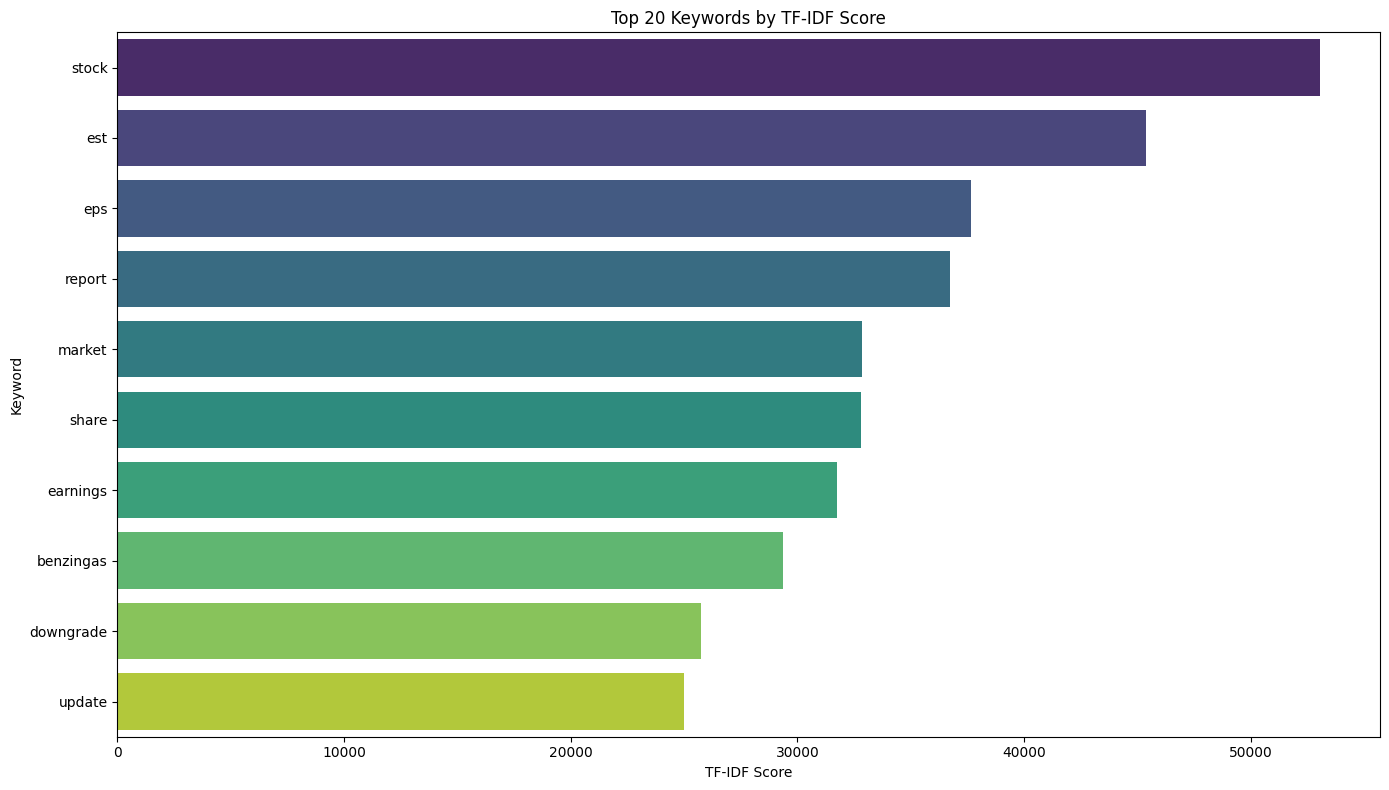

In [45]:
sm.ConvertTopKeywordsToDF(top_keywords)

Let's see word cloud for top key words

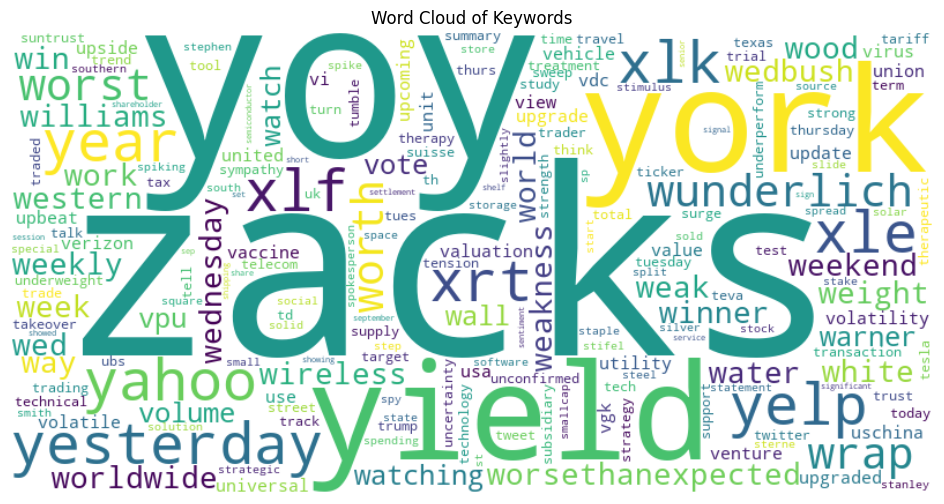

e:\Development\10-Accademy-week-1\notebooks\../scripts\sentimentAnalysis.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=top_freqs, palette='viridis')


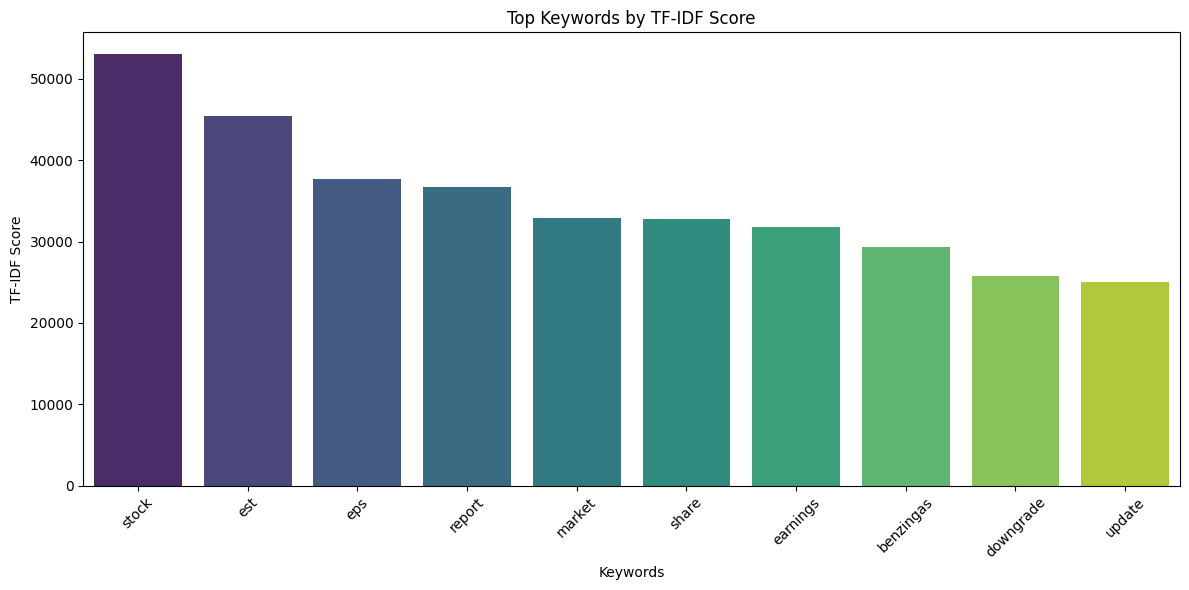

In [52]:
sm.VisualizeKeywords(vocabulary,top_keywords)

 Perform topic modeling using Latent Dirichlet Allocation (LDA)

In [ ]:
# Initialize LDA
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)

Generate Word Cloud Visualize the most common words in the headlines.

In [ ]:
# Generate word cloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud


text = ' '.join(ProcessedHeadline)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()